# EES - 331: Geohydrology

## Graded Assignment 2: Straight line method & Variable slope method

### Name: Om Vaknalli
### Roll No. : 18376
### Date of Submission: 4th October 2020

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Defining the required functions
def simplify(df):
    df = np.array(df)
    df = df.reshape(-1)
    df = np.delete(df, 0)
    for m in range(len(df)):
        df[m] = float(df[m])
    return df

def Insert_row(row_number, df, row_value):
    start_upper = 0
    end_upper = row_number
    start_lower = row_number
    end_lower = df.shape[0]
    upper_half = [*range(start_upper, end_upper, 1)]
    lower_half = [*range(start_lower, end_lower, 1)]
    lower_half = [x.__add__(1) for x in lower_half]
    index_ = upper_half + lower_half
    df.index = index_
    df.loc[row_number] = row_value
    df = df.sort_index()
    return df

In [ ]:
#Importing the data from the datafile
dataset_raw = pd.read_csv("StreamFlowData.txt", header = None, names = ["Date"])

In [ ]:
#Manipulating the data to a more organised form
#Finding the time elapsed
dataset_raw[["Date","rest"]] = dataset_raw["Date"].str.split(" ", n = 1, expand = True)
dataset_raw_1 = dataset_raw["rest"].str.split(" ", expand = True)
hours = np.char.array(dataset_raw_1[[7]].values)
colon = np.char.array(dataset_raw_1[[8]].values)
minutes = np.char.array(dataset_raw_1[[9]].values)
disch = np.char.array(dataset_raw_1[[17]].values)
for i in range(1, 673, 1):
    dataset_raw_1.iloc[[i],[4]] = 15 * (i - 1)
dataset_raw_1[[3]] = (hours + colon + minutes).astype(str)
date = pd.DataFrame(dataset_raw["Date"])
time = dataset_raw_1[[3]]
time_elapsed = dataset_raw_1[[4]]
discharge = dataset_raw_1[[17]]
dataset_raw_2 = pd.concat([date, time, time_elapsed, discharge], axis = 1, sort = False)
dataset_raw_2.drop([0], inplace = True)
dataset_raw_2.columns = ["Date", "Time", "Time_Elapsed_(mins)", "Discharge_(cubic_feet_per_sec)"]
discharge = simplify(discharge)
time_elapsed = simplify(time_elapsed)

Text(0, 0.5, 'Discharge (cubic feet per sec)')

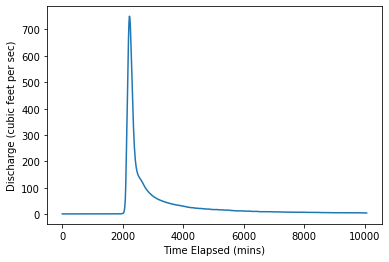

In [ ]:
#Plotting discharge vs. time elapsed
plt.plot(time_elapsed, discharge)
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Discharge (cubic feet per sec)')

Text(0, 0.5, 'Discharge (cubic feet per sec)')

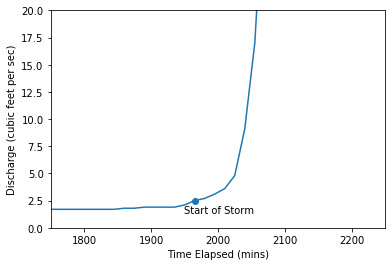

In [ ]:
#Identifying the starting point of storm
plt.axis([1750, 2250, 0, 20])
plt.annotate('Start of Storm', xy = (1950, 2.1), xytext = (1950, 2.1), horizontalalignment = 'left', verticalalignment = 'top')
plt.plot(time_elapsed, discharge, marker = 'o', markevery = [131])
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Discharge (cubic feet per sec)')

Text(0, 0.5, 'Discharge (cubic feet per sec)')

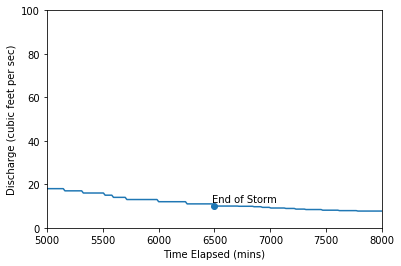

In [ ]:
#Identifying the ending point of storm
plt.axis([5000, 8000, 0, 100])
plt.annotate('End of Storm', xy = (6480, 11), xytext = (6480, 11), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.plot(time_elapsed, discharge, marker = 'o', markevery = [433])
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Discharge (cubic feet per sec)')

### Straight Line Method

Text(0, 0.5, 'Discharge (cubic feet per sec)')

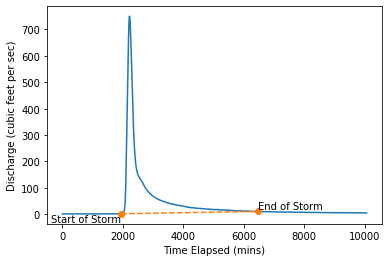

In [ ]:
#Plotting the straight line between starting and ending of storm
plt.annotate('Start of Storm', xy = (1950, 2.1), xytext = (1950, 2.1), horizontalalignment = 'right', verticalalignment = 'top')
plt.annotate('End of Storm', xy = (6480, 11), xytext = (6480, 11), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.plot(time_elapsed, discharge)
plt.plot([1950, 6480], [2.1, 11],  marker = 'o', linestyle = '--')
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Discharge (cubic feet per sec)')

In [ ]:
#Finding the slope of the straight line
slope = (11 - 2.1) / (6480 - 1950)
slope

0.0019646799116997795

In [ ]:
#Finding the base-flow and direct runoff components of the discharge
dataset_raw_1[[15]] = 0
for j in range(1, 131, 1):
    dataset_raw_1.iloc[[j],[15]] = float(disch[j])
    dataset_raw_1.iloc[[j],[16]] = 0
for k in range(131, 434, 1):
    dataset_raw_1.iloc[[k],[15]] = 2.1 + slope*(float(time_elapsed[k-1]) - 1950)
    temp = dataset_raw_1.iloc[[k],[15]].values[0]
    dataset_raw_1.iloc[[k],[16]] = float(disch[k]) - float(temp[0])
for l in range(434, 673, 1):
    dataset_raw_1.iloc[[l],[15]] = float(disch[l])
    dataset_raw_1.iloc[[l],[16]] = 0
base_flow = dataset_raw_1[[15]]
direct_runoff = dataset_raw_1[[16]]
dataset = pd.concat([dataset_raw_2, base_flow, direct_runoff], axis = 1, sort = False)
dataset.drop([0], inplace = True)
dataset.columns = ["Date", "Time", "Time_Elapsed_(mins)", "Discharge_(cubic_feet_per_sec)", "Base_Flow_(cubic_feet_per_sec)", "Direct_Runoff_(cubic_feet_per_sec)"]
base_flow = simplify(base_flow)
direct_runoff = simplify(direct_runoff)
pd.set_option('display.max_rows', 700)
dataset

,Date,Time,Time_Elapsed_(mins),Discharge_(cubic_feet_per_sec),Base_Flow_(cubic_feet_per_sec),Direct_Runoff_(cubic_feet_per_sec)
1,2000/09/24,00:00,0,1.5,1.5,0
2,2000/09/24,00:15,15,1.5,1.5,0
3,2000/09/24,00:30,30,1.5,1.5,0
4,2000/09/24,00:45,45,1.5,1.5,0
5,2000/09/24,01:00,60,1.5,1.5,0
6,2000/09/24,01:15,75,1.5,1.5,0
7,2000/09/24,01:30,90,1.5,1.5,0
8,2000/09/24,01:45,105,1.5,1.5,0
9,2000/09/24,02:00,120,1.5,1.5,0
10,2000/09/24,02:15,135,1.5,1.5,0


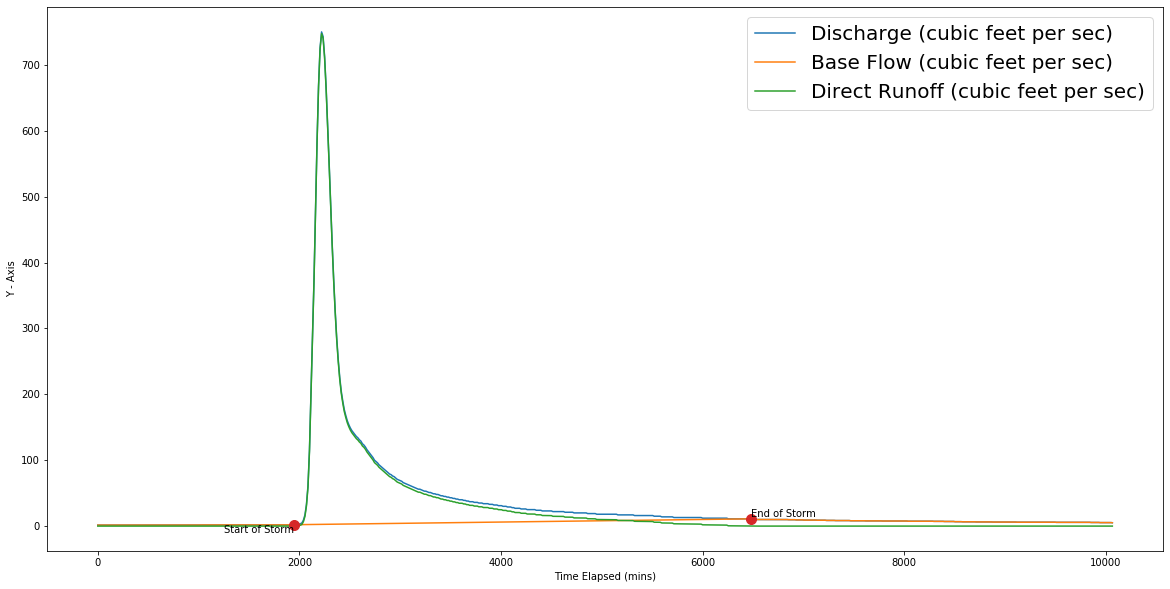

In [ ]:
#Plotting the discharge, base flow and direct runoff together.
fig, ax = plt.subplots(figsize = (20, 10))
plt.annotate('Start of Storm', xy = (1950, 2.1), xytext = (1950, 2.1), horizontalalignment = 'right', verticalalignment = 'top')
plt.annotate('End of Storm', xy = (6480, 11), xytext = (6480, 11), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.plot(time_elapsed, discharge, label = 'Discharge (cubic feet per sec)')
plt.plot(time_elapsed, base_flow, label = 'Base Flow (cubic feet per sec)')
plt.plot(time_elapsed, direct_runoff, label = 'Direct Runoff (cubic feet per sec)')
plt.plot([1950, 6480], [2.1, 11],  marker = 'o', markersize = 10, linestyle = 'None')
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Y - Axis')
plt.legend(prop = {'size': 20})
plt.rcParams.update({'font.size': 20})

### Variable Slope Method

<function matplotlib.pyplot.show(*args, **kw)>

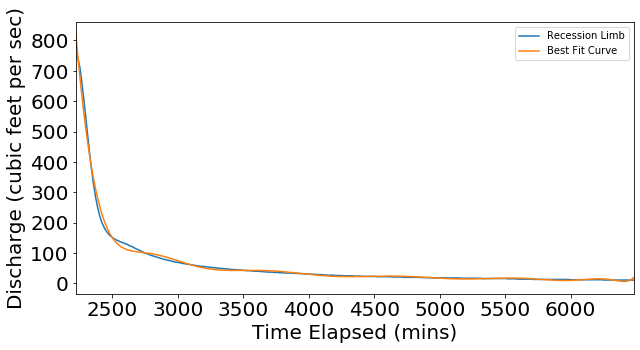

In [ ]:
# Finding the best fit function and inflection point to the recession limb
x = list(time_elapsed[148 : 433])
y = list(discharge[148 : 433])
coefficients = np.polyfit(x, y, 13)
poly = np.poly1d(coefficients)
new_x = x
new_y = poly(x)
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(x, y, label = 'Recession Limb')
plt.plot(new_x, new_y, label = 'Best Fit Curve')
plt.legend(prop = {'size': 10})
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Discharge (cubic feet per sec)')
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.savefig("line.jpg")
plt.rcParams.update({'font.size': 15})
plt.show

In [ ]:
#Finding equation of the best fit curve
print(poly)

           13             12           11             10             9
1.145e-39 x  - 6.528e-35 x  + 1.7e-30 x  - 2.678e-26 x  + 2.846e-22 x
              8             7           6            5             4
 - 2.154e-18 x + 1.193e-14 x - 4.9e-11 x + 1.49e-07 x - 0.0003314 x
           3         2
 + 0.5236 x - 556.1 x + 3.557e+05 x - 1.034e+08


In [ ]:
#Finding the coefficients of 2nd differential of the best fit function
np.polyder(np.polyder(coefficients))

array([ 1.78667936e-37, -8.61650980e-33,  1.87021548e-28, -2.41064395e-24,
        2.04945592e-20, -1.20619185e-16,  5.01247713e-13, -1.47011406e-09,
        2.98080859e-06, -3.97738474e-03,  3.14163841e+00, -1.11221937e+03])

In [ ]:
#Finding the inflection point
np.roots(np.polyder(np.polyder(coefficients)))
#Closest matching inflection point of best fit curve to that of original recession limb occurs at time elapsed = 2720.81261398 mins.
x_inflect = 2720.81261398
y_inflect = poly(x_inflect)
(x_inflect, y_inflect)

(2720.81261398, 102.22428207099438)

In [ ]:
#Finding slopes of baseflow before and after storm
slope_1 = (1.9 - 1.5) / (1935 - 0)
slope_3 = (5.1 - 10) / (11065 - 6495)
(slope_1, slope_3)

(0.00020671834625322994, -0.0010722100656455143)

In [ ]:
#Finding the interpolated projected points under the peak and the inflection point and their intermediate slope
baseflow_peak = 1.9 + slope_1*(2220 - 1935)
baseflow_inflect = 10 + slope_3*(x_inflect - 6495)
slope_2 = (baseflow_inflect - baseflow_peak) / (x_inflect - 2220)
(baseflow_peak, baseflow_inflect, slope_2)

(1.9589147286821704, 14.046721704922977, 0.024136386821765495)

In [ ]:
#Finding the base-flow and direct runoff components of the discharge
dataset_raw_1[[13]] = 0
for p in range(1, 150, 1):
    dataset_raw_1.iloc[[p],[13]] = 1.9 + slope_1*(float(time_elapsed[p-1] - 1935))
for q in range(1, 131, 1):
    dataset_raw_1.iloc[[q],[14]] = 0
for r in range(150, 184, 1):
    dataset_raw_1.iloc[[r],[13]] = baseflow_peak + slope_2*(float(time_elapsed[r-1] - 2220))
for s in range(184, 673, 1):
    dataset_raw_1.iloc[[s],[13]] = baseflow_inflect + slope_3*(float(time_elapsed[s-1] - x_inflect))
for u in range(131, 434, 1):
    temp1 = dataset_raw_1.iloc[[u],[13]].values[0]
    dataset_raw_1.iloc[[u],[14]] = float(disch[u]) - float(temp1[0])
for v in range(434, 673, 1):
    dataset_raw_1.iloc[[v],[14]] = 0
base_flow = dataset_raw_1[[13]]
direct_runoff = dataset_raw_1[[14]]
dataset = pd.concat([dataset_raw_2, base_flow, direct_runoff], axis = 1, sort = False)
dataset.drop([0], inplace = True)
dataset.columns = ["Date", "Time", "Time_Elapsed_(mins)", "Discharge_(cubic_feet_per_sec)", "Base_Flow_(cubic_feet_per_sec)", "Direct_Runoff_(cubic_feet_per_sec)"]
dataset = Insert_row(183, dataset, ['2000/09/25','Inflection Point','2735.81','102.22','14.0467','88.1776'])
base_flow = simplify(base_flow)
direct_runoff = simplify(direct_runoff)
pd.set_option('display.max_rows', 700)
dataset

,Date,Time,Time_Elapsed_(mins),Discharge_(cubic_feet_per_sec),Base_Flow_(cubic_feet_per_sec),Direct_Runoff_(cubic_feet_per_sec)
0,2000/09/24,00:00,0,1.5,1.5,0
1,2000/09/24,00:15,15,1.5,1.5031,0
2,2000/09/24,00:30,30,1.5,1.5062,0
3,2000/09/24,00:45,45,1.5,1.5093,0
4,2000/09/24,01:00,60,1.5,1.5124,0
5,2000/09/24,01:15,75,1.5,1.5155,0
6,2000/09/24,01:30,90,1.5,1.5186,0
7,2000/09/24,01:45,105,1.5,1.52171,0
8,2000/09/24,02:00,120,1.5,1.52481,0
9,2000/09/24,02:15,135,1.5,1.52791,0


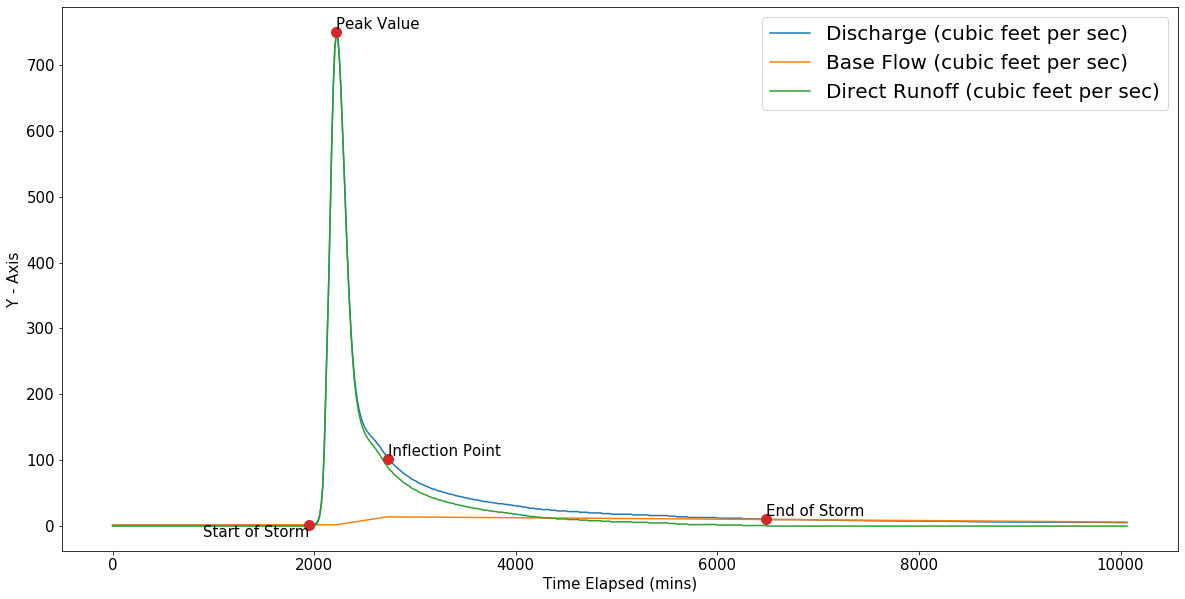

In [ ]:
#Plotting the discharge, base flow and direct runoff together.
fig, ax = plt.subplots(figsize = (20, 10))
plt.annotate('Start of Storm', xy = (1950, 2.1), xytext = (1950, 2.1), horizontalalignment = 'right', verticalalignment = 'top')
plt.annotate('End of Storm', xy = (6480, 11), xytext = (6480, 11), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.annotate('Inflection Point', xy = (2735.81, 102.22), xytext = (2735.81, 102.22), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.annotate('Peak Value', xy = (2220, 750), xytext = (2220, 750), horizontalalignment = 'left', verticalalignment = 'bottom')
plt.plot(time_elapsed, discharge, label = 'Discharge (cubic feet per sec)')
plt.plot(time_elapsed, base_flow, label = 'Base Flow (cubic feet per sec)')
plt.plot(time_elapsed, direct_runoff, label = 'Direct Runoff (cubic feet per sec)')
plt.plot([1950, 2220, 2735.81, 6480], [2.1, 750, 102.22, 11],  marker = 'o', markersize = 10, linestyle = 'None')
plt.xlabel('Time Elapsed (mins)')
plt.ylabel('Y - Axis')
plt.legend(prop = {'size': 20})
plt.rcParams.update({'font.size': 20})